# Ames House Price Prediction

## Rukhshan Alam



The dataset we will be working with later on in the next section:

* Ames Iowa Data Set: http://jse.amstat.org/v19n3/decock.pdf

In [776]:
import pandas as pd

In [777]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [778]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [779]:
with open('Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [780]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [781]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

----
----

In [782]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

## Dealing with outliers

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

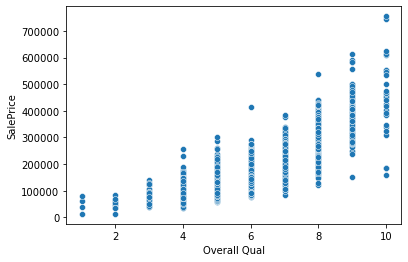

In [783]:
sns.scatterplot(data = df, x = 'Overall Qual', y = 'SalePrice')

As we see here, the pice of house is directly correlated to its oveerall quality, the price of houses increase as the quality gets better. But we have three outliers here, that have top quality but prices are very low.

In [784]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

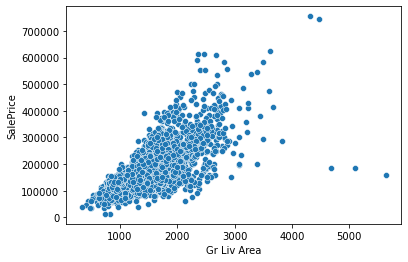

In [785]:
# plotting with Gr Liv Area 
sns.scatterplot(data = df, x = 'Gr Liv Area', y = 'SalePrice')

same as Overall quality. Bigger living area means higher price. But three outliers
lets explore those, and see if they worth keeping or not.


In [786]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


##### It is confirmed that these are same three houses that are not correlated with house quality and Living area has no direct impact on its sale price
##### It is better to drop these index, otherwise these values might cause trouble in latter Machine learning model

### Dropping Outliers

In [787]:
outliers_drop = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)].index

In [788]:
outliers_drop

Int64Index([1498, 2180, 2181], dtype='int64')

In [789]:
df = df.drop(outliers_drop, axis = 0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

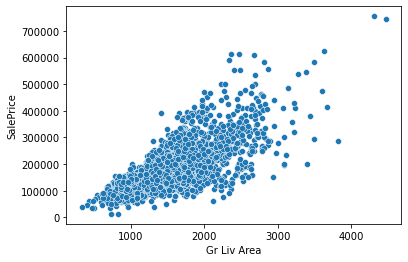

In [790]:
sns.scatterplot(data = df, x = 'Gr Liv Area', y = 'SalePrice')

In [791]:
df.to_csv("Ames_Cleaned_Outliers.csv")

## Dealing with Missing Data

In [792]:
df = pd.read_csv('Ames_Cleaned_Outliers.csv')

In [793]:
df.head()

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


###### PID column has no paticular feature, it will not be any use in any ML model
###### It is only an ID just as index number so there is no valid point keeping this feature

In [794]:
df = df.drop('PID', axis = 1)

In [795]:
df = df.drop('Unnamed: 0', axis = 1)

In [796]:
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2923,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2924,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2925,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [797]:
100 * df.isnull().sum() / len(df) 

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

### Defining function to get percent of missing values 

In [798]:
def nullper(df):
    nan_per = 100 * df.isnull().sum() / len(df)
    nan_per = nan_per[nan_per > 0].sort_values()
    return nan_per

In [799]:
nan_per = nullper(df)

In [800]:
nan_per

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

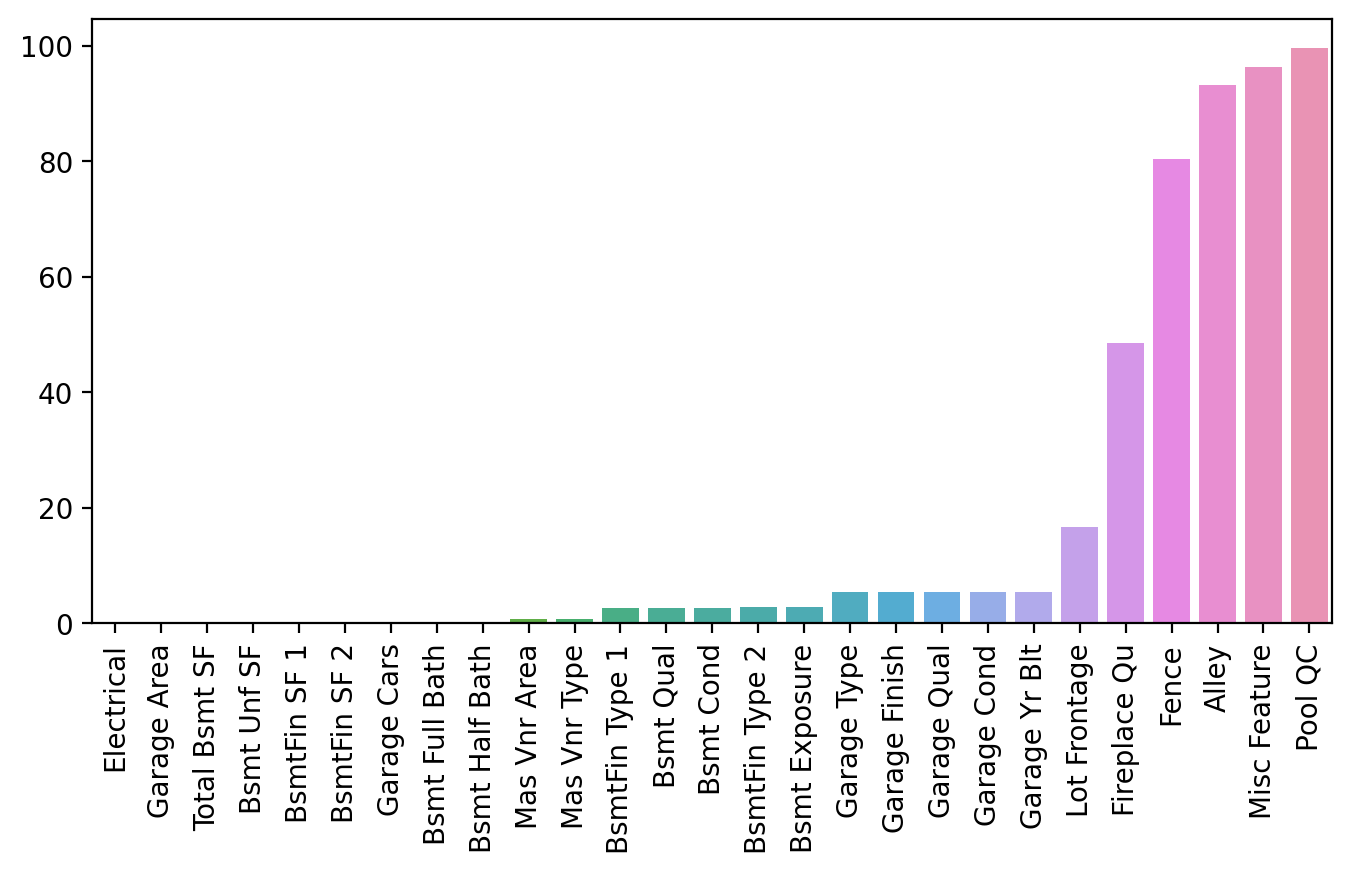

In [801]:
# plotting percentage of missing feature
plt.figure(figsize=(8,4), dpi = 200)
sns.barplot(x = nan_per.index, y = nan_per )
plt.xticks(rotation = 90);

In [802]:
nan_per[nan_per < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [803]:
100/len(df)

0.0341646737273659

In [804]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [805]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

##### Now we know that row that missing value for Electrical are not same as the rows that missing values for Garage area.

Droping null values in Electrical and Garage cars, it will help take out few other rows with missing data

In [806]:
df = df.dropna(axis = 0, subset = ['Electrical', 'Garage Cars'])

In [807]:
nan_per = nullper(df)

In [808]:
nan_per[nan_per < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

(0.0, 2.0)

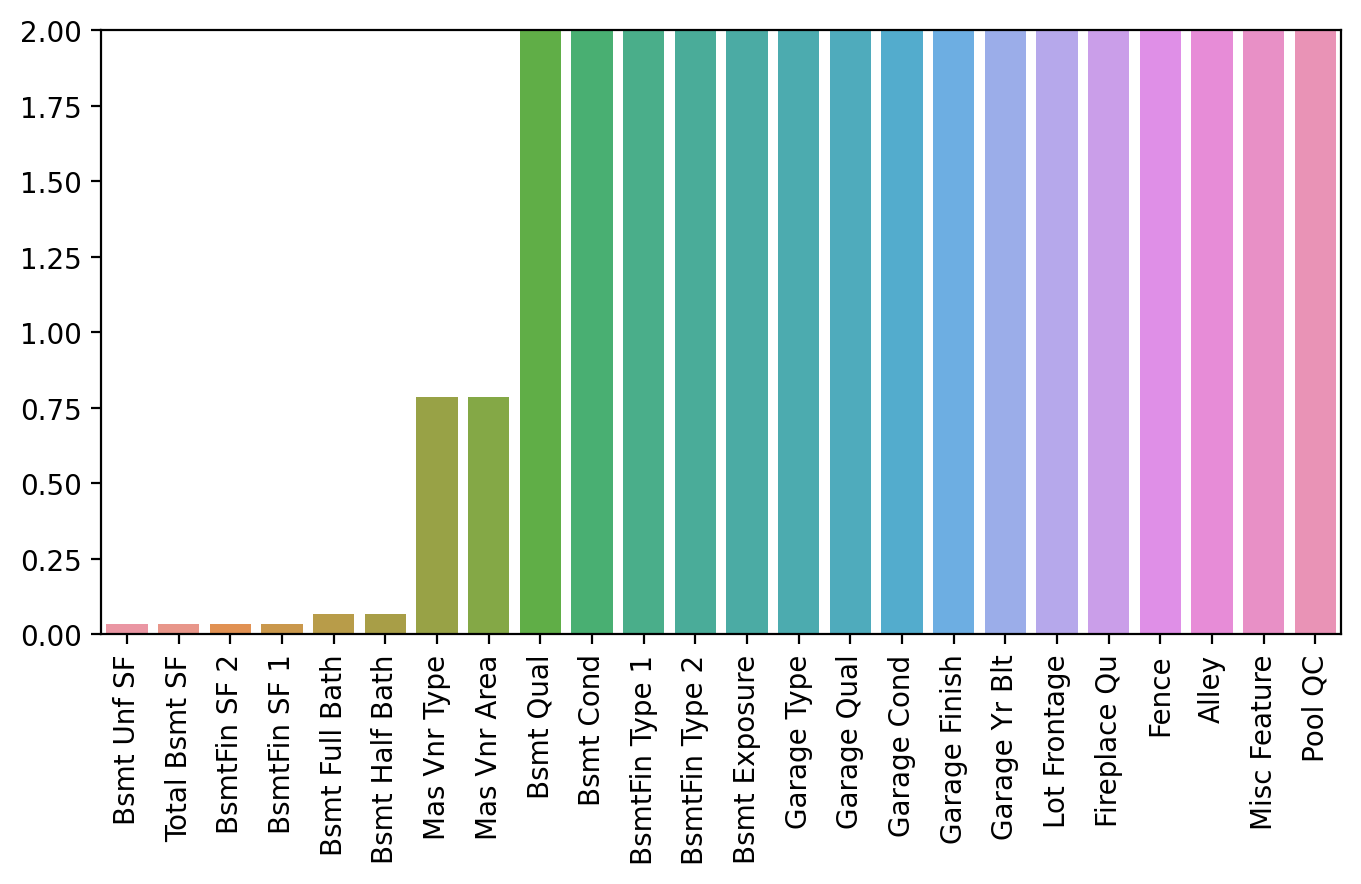

In [809]:
plt.figure(figsize=(8,4), dpi = 200)
sns.barplot(x = nan_per.index, y = nan_per )
plt.xticks(rotation = 90);
plt.ylim(0,2)

#### If we look at the text file above, we can analyze that missing values for Basement, Garage and Mas Vnr feature could mean Nan, meaning there is no basement in that house.
#### Instead of dropping these rows we can fill the numeric values with 0 and strings with 'None'

In [810]:
# bsmt numerical rows fillna = 0
bsmt_num_fill = ['Bsmt Unf SF', 'Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_fill] = df[bsmt_num_fill].fillna(0)

# bsmt string rows fillna = NONE (NOTE: NONE is not same as python NONE function)
bsmt_str_fill = ['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Exposure']
df[bsmt_str_fill] = df[bsmt_str_fill].fillna('NONE')

/var/folders/ld/984t852d7kx65v4rkqstw9p00000gn/T/ipykernel_64919/2413577520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_num_fill] = df[bsmt_num_fill].fillna(0)
/var/folders/ld/984t852d7kx65v4rkqstw9p00000gn/T/ipykernel_64919/2413577520.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_str_fill] = df[bsmt_str_fill].fillna('NONE')


In [811]:

nan_per = nullper(df)

In [812]:
nan_per[nan_per > 1]

Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

(0.0, 2.0)

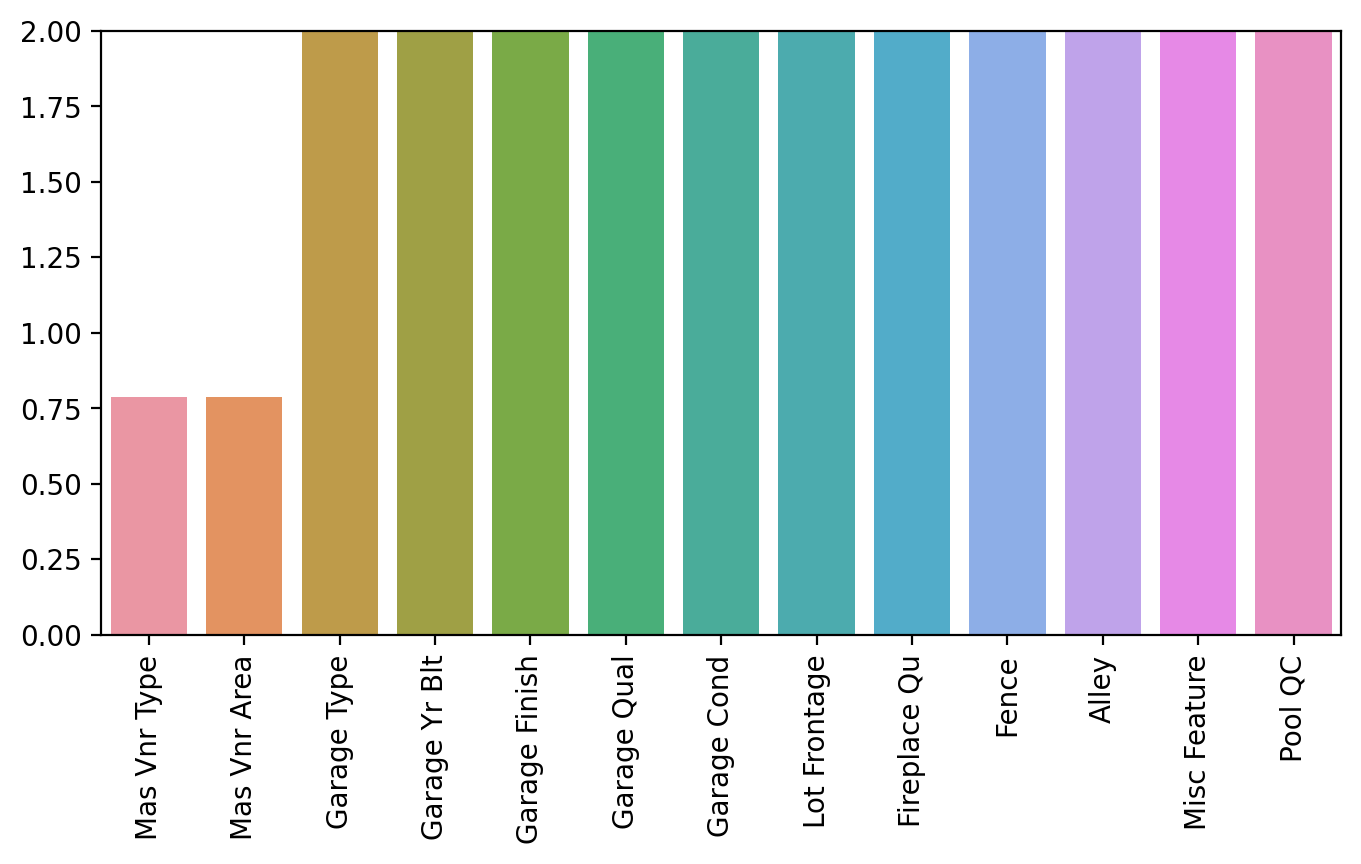

In [813]:
plt.figure(figsize=(8,4), dpi = 200)
sns.barplot(x = nan_per.index, y = nan_per )
plt.xticks(rotation = 90);
plt.ylim((0,2))

In [814]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('NONE')

/var/folders/ld/984t852d7kx65v4rkqstw9p00000gn/T/ipykernel_64919/2782387211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('NONE')


In [815]:
# Mas Vnr numerical rows fillna = 0

df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

/var/folders/ld/984t852d7kx65v4rkqstw9p00000gn/T/ipykernel_64919/299238969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)


In [816]:
nan_per = nullper(df)
nan_per[nan_per > 1]

Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

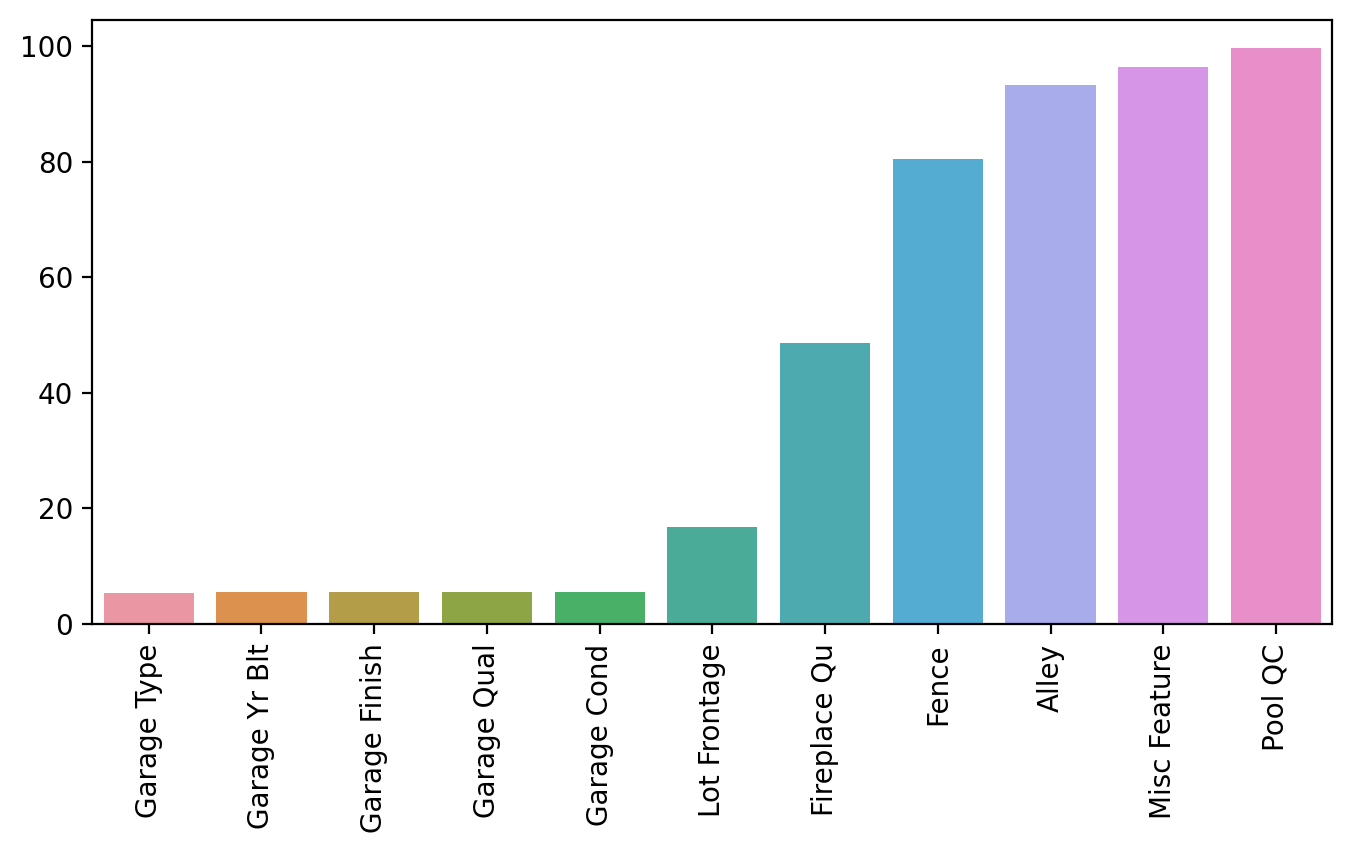

In [817]:
plt.figure(figsize=(8,4), dpi = 200)
sns.barplot(x = nan_per.index, y = nan_per )
plt.xticks(rotation = 90);


#### If we look at the text file above, we can analyze that missing values for Garage feature could mean Nan, meaning there is no basement in that house.
#### Instead of dropping these rows we can fill the values with 'None'

In [818]:
# Garage string rows fillna = 'None'

grg_str_fill = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [819]:
df[grg_str_fill] = df[grg_str_fill].fillna('None')

/var/folders/ld/984t852d7kx65v4rkqstw9p00000gn/T/ipykernel_64919/1403474380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[grg_str_fill] = df[grg_str_fill].fillna('None')


In [820]:
# Garage numerical rows fillna = 0

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

/var/folders/ld/984t852d7kx65v4rkqstw9p00000gn/T/ipykernel_64919/1866400331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)


In [821]:
nan_per = nullper(df)
nan_per[nan_per > 1]

Lot Frontage    16.752137
Fireplace Qu    48.547009
Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

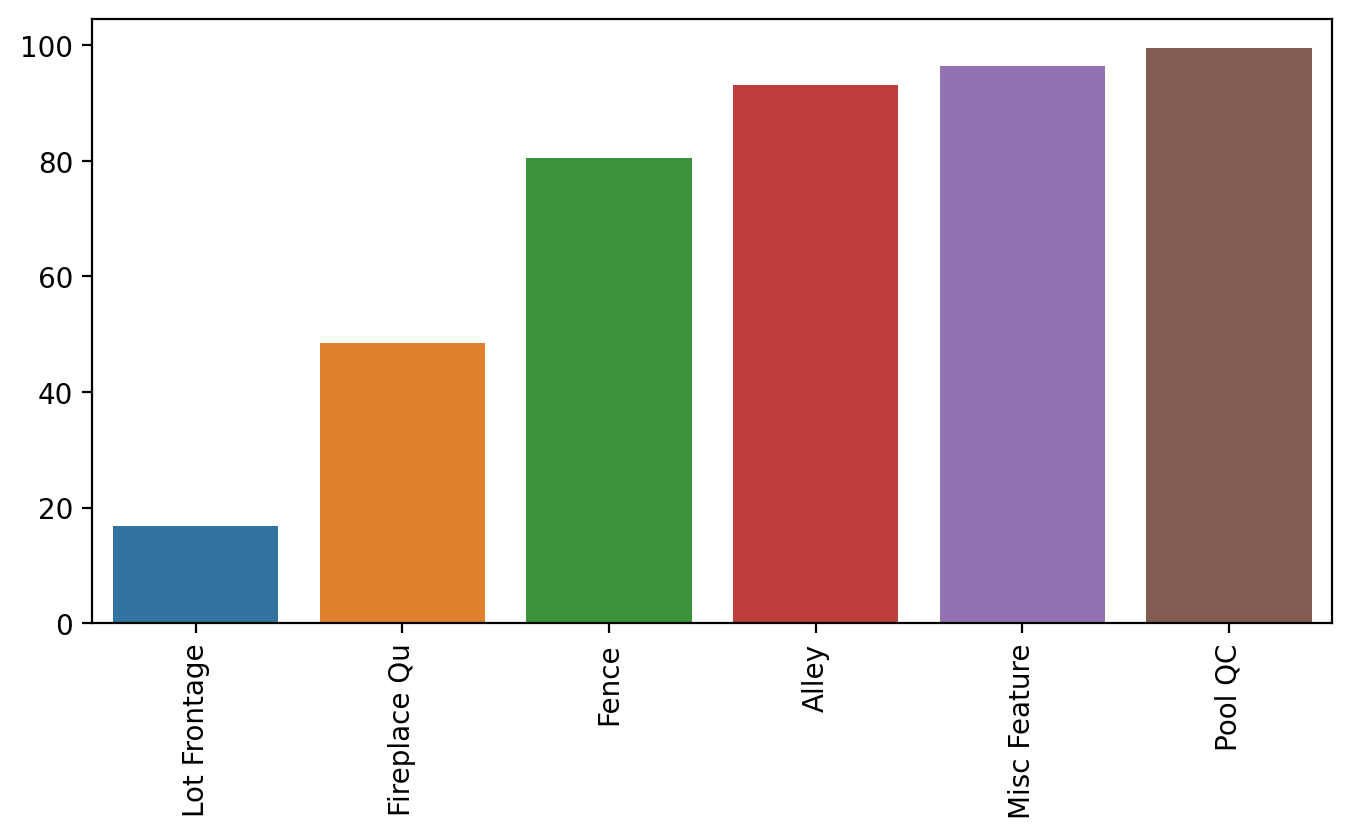

In [822]:
plt.figure(figsize=(8,4), dpi = 200)
sns.barplot(x = nan_per.index, y = nan_per )
plt.xticks(rotation = 90);

### Dropping columns that are missing more than 80% of Data

In [823]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis = 1)

In [824]:
nan_per = nullper(df)
nan_per[nan_per > 1]

Lot Frontage    16.752137
Fireplace Qu    48.547009
dtype: float64

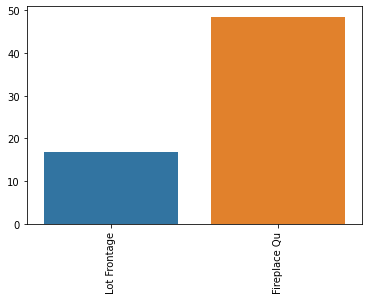

In [825]:

sns.barplot(x = nan_per.index, y = nan_per )
plt.xticks(rotation = 90);

In [826]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [827]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [828]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property



<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

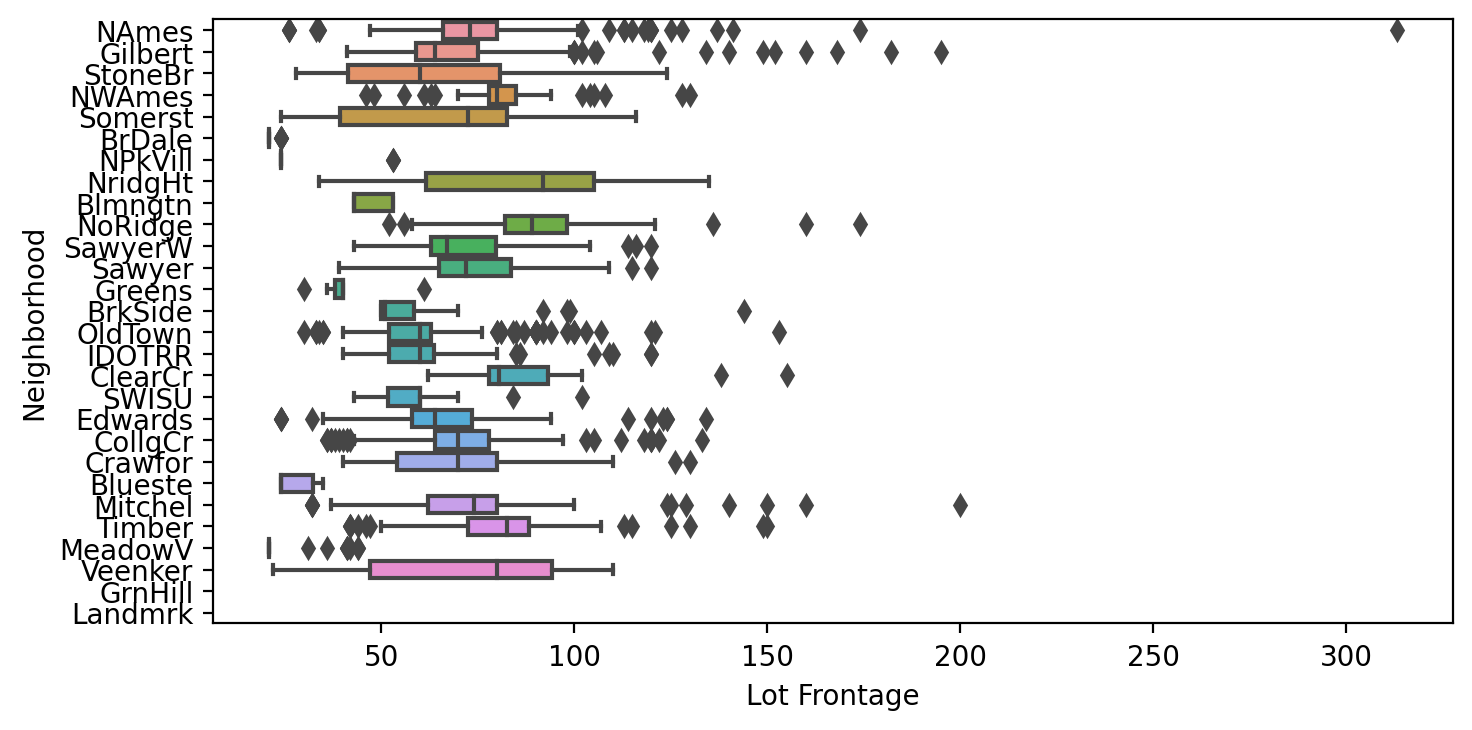

In [829]:
plt.figure(figsize=(8,4), dpi = 200)
sns.boxplot(x = 'Lot Frontage', y = 'Neighborhood', data = df)

In [830]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

## Filling missing values of Lot Frontage with mean group value

In [831]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [832]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [833]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [834]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

# Dealing with Categorical Data

In [835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2926
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

MSSubClass: Identifies the type of dwelling involved in the sale.	
Ms Sub Class is a catagorical column

In [836]:
# converting MS SubClass to object type
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [837]:
df['MS SubClass']

0       20
1       20
2       20
3       20
4       60
        ..
2922    80
2923    20
2924    85
2925    20
2926    60
Name: MS SubClass, Length: 2925, dtype: object

In [838]:
# seperating object dtypes and numerical dtypes

In [839]:
# object dtypes
obj_type_df = df.select_dtypes(include = 'object')

In [840]:
obj_type_df

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2923,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2924,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2925,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [841]:
obj_type_df.columns

Index(['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [842]:
# numerical dtypes
num_type_df = df.select_dtypes(exclude = 'object')

In [843]:
# creating dummies for onject dtypes
obj_dummies_df = pd.get_dummies(obj_type_df, drop_first = True)

In [854]:
obj_dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2926
Columns: 239 entries, MS SubClass_150 to Sale Condition_Partial
dtypes: uint8(239)
memory usage: 705.5 KB


In [853]:
num_type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2926
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath     

In [846]:
final_df = pd.concat([num_type_df, obj_dummies_df], axis = 1)

In [855]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2926
Columns: 275 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(25), uint8(239)
memory usage: 1.5 MB


### The label we are trying to predict is the SalePrice column. 
### Separating out the data into X features and y labels


In [856]:
X = final_df.drop('SalePrice', axis = 1)
y = final_df['SalePrice']

#### split up X and y into a training set and test set. 
#### Since we will later be using a Grid Search strategy, set your test proportion to 10%. 


In [857]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)


In [858]:
# Scaling X features 
from sklearn.preprocessing import StandardScaler

In [862]:
scalar = StandardScaler()

#### fit and transform test and train features

In [863]:
scalar.fit(X_train)

StandardScaler()

In [864]:
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

## We will use an Elastic Net model

In [865]:
from sklearn.linear_model import ElasticNet

In [867]:
e_n_model = ElasticNet(max_iter= 1000000)

#### Elastic Net model has two main parameters, alpha and the L1 ratio

In [868]:
# Create a dictionary parameter grid of values for the ElasticNet
param_grid = {'alpha' : [0.1, 1, 5, 10, 50, 100], 'l1_ratio' : [0.1, 0.5, .9, .95, .99, 1] }

#### Using scikit-learn to create a GridSearchCV object and running a grid search for the best parameters for this model based on the scaled training

In [869]:
from sklearn.model_selection import GridSearchCV

In [871]:
grid_model = GridSearchCV(estimator = e_n_model, param_grid = param_grid, scoring = 'neg_mean_squared_error',
                          cv = 5, verbose = 1)

In [872]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

#### Display the best combination of parameters for your model

In [873]:
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1, max_iter=1000000)

### Evaluate model's performance on the unseen 10% scaled test set

In [874]:
model_prediction = grid_model.predict(X_test_scaled)

In [877]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [878]:
MAE = mean_absolute_error(y_test, model_prediction)

In [880]:
MSE = mean_squared_error(y_test, model_prediction)

In [881]:
RMSE = np.sqrt(MSE)

In [883]:
MAE

14190.261858023377

In [884]:
MSE

422676513.7100516

In [885]:
RMSE


20559.098076278824

In [886]:
pred_target = pd.concat([y_test, pd.Series(model_prediction, index = X_test.index)], axis = 1)

In [888]:
pred_target.columns = ['Sale_Price', 'predicted_Price']

In [889]:
pred_target

,Sale_Price,predicted_Price
1825,125500,115055.679045
891,320000,330687.850562
1795,212109,201380.519997
56,185088,196393.955263
2849,102000,102208.635747
...,...,...
1190,140500,136942.966592
1525,147500,141457.155353
300,289000,283479.506072
321,378500,335149.397532


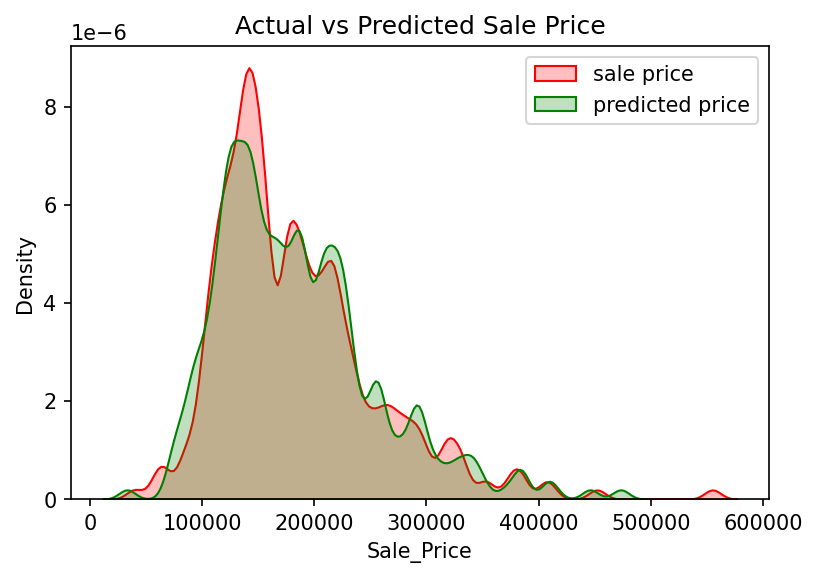

In [920]:
# plotting the actual sale price and predicted sale price
plt.figure(figsize = (6, 4), dpi = 150)
plt.title('Actual vs Predicted Sale Price')
sns.kdeplot(pred_target['Sale_Price'], color='red', bw_method = 0.1, label ='sale price', fill = True)
sns.kdeplot(pred_target['predicted_Price'], color='green', bw_method = 0.1, label ='predicted price', fill = True)
plt.legend()